# Import all necessary 

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt 
import seaborn as sns
from pylab import savefig

warnings.filterwarnings('ignore')

## Read Data

In [2]:
#df = pd.read_excel('./data/literature.xlsx',
#                  sheet_name = 'Main', header=[1,2])

In [3]:
#df.rename(columns={'Unnamed: 0_level_1':'',
#                   'Unnamed: 1_level_1':'',
#                   'Unnamed: 2_level_1':'',
#                   'Unnamed: 3_level_1':'',
#                   'Unnamed: 50_level_1':'',
#                   'Unnamed: 52_level_1':'',
#                   'Unnamed: 53_level_1':''
#                  }, inplace=True)

# Save Data as Pickle

In [4]:
#df.to_pickle('./data/literature.pkl')

# Read Pickle

In [5]:
df = pd.read_pickle('./data/literature.pkl')

## Specify overall categories

In [6]:
artefacts = ['Konstrukt', 'Methode', 'Modell', 'Instanz']
evaluation = ['Beobachtung', 'Analytisch', 'Experiementel', 'Testing', 'Beschreibende']

artefacts_lv1 = df[artefacts].columns.get_level_values(1)
evaluation_lv1 = df[evaluation].columns.get_level_values(1)

all_categories = artefacts+evaluation

In [7]:
Paper_DESRIST_2016 = 22
Paper_DESRIST_2017 = 36
Paper_DESRIST_2018 = 24
Paper_DESRIST_2019 = 20

Paper_WI_2017 = 118
Paper_WI_2019 = 171

Paper_MKWI_2016 = 151
Paper_MKWI_2018 = 195

## Transform Data to singlelevel

In [8]:
dfnl = df.droplevel(0, axis=1)

In [9]:
dfnl.columns = ['Konferenz-ID', 'Konferenz', 'Jahr', 'Paper']+dfnl.columns[4:-2].tolist()+['Keine Evaluierung', 'DSR nicht verwendet']

## Transform Paper Count

In [10]:
Paper_DESRIST = Paper_DESRIST_2016+Paper_DESRIST_2017+Paper_DESRIST_2018+Paper_DESRIST_2019
Paper_MKWI = Paper_MKWI_2016+Paper_MKWI_2018
Paper_WI = Paper_WI_2017+Paper_WI_2019

Paper_2016 = Paper_DESRIST_2016+Paper_MKWI_2016
Paper_2017 = Paper_DESRIST_2017+Paper_WI_2017
Paper_2018 = Paper_DESRIST_2018+Paper_MKWI_2018
Paper_2019 = Paper_DESRIST_2019+Paper_WI_2019

# Results

## Wie viele Paper (in %) validieren ihre Artefakte trotz DSR nicht?

**Pro Konferenz**

In [11]:
df_eva = df[['Konferenz', 'Paper', 'DSR nicht verwendet']]

In [12]:
df_eva

,Konferenz,Paper,DSR nicht verwendet
,,,
0,WI,(Espig et al 2019),0
1,WI,(Dremel et al 2019),1
2,WI,(Herrenkind et al 2019),0
3,WI,(Sauer und Schubert 2019),1
4,WI,(Poeppelbuss and Lubarski 2019),0
...,...,...,...
234,DESRIST,"(Akoka et al, 2019)",0
235,DESRIST,"(Babaian et al, 2019)",0
236,DESRIST,"(Zavolokina et al, 2019)",0


In [13]:
df_eva = df_eva[df_eva['DSR nicht verwendet'] == 0].drop('DSR nicht verwendet', axis=1)

In [14]:
for i in evaluation:
    df_eva[str(i)] = df[str(i)].sum(axis=1)
    
    
df_eva['Evaluiert'] = df_eva.apply(lambda x: 1 if x[['Beobachtung', 'Analytisch', 'Experiementel', 'Testing', 'Beschreibende']].sum() > 0 else 0, axis = 1)

In [15]:
df_eva_grouped = df_eva.groupby('Konferenz').count()[['Paper']].join(df_eva.groupby('Konferenz').sum())[['Paper', 'Evaluiert']]

In [16]:
df_eva_grouped['Evaluiert in %'] = df_eva_grouped.apply(lambda x: round((x['Evaluiert']/x['Paper'])*100,2),axis=1)
df_eva_grouped['Nicht Evaluiert in %'] = 100-df_eva_grouped['Evaluiert in %']
df_eva_grouped.rename(columns={'Paper':'DSR eingesetzt'});

In [17]:
df_eva_grouped['Paper'] = np.array([Paper_DESRIST, Paper_MKWI, Paper_WI])
df_eva_grouped['DSR Erwähnung'] = dfnl.groupby('Konferenz').count()[['Paper']]
df_eva_grouped['DSR Einsatz'] = df_eva.groupby('Konferenz').count()[['Paper']]
df_eva_grouped['DSR Einsatz in % zu Gesamt'] = round((df_eva_grouped['DSR Einsatz']/df_eva_grouped['Paper'])*100,2)

In [18]:
df_eva_grouped = df_eva_grouped[['Paper', 'DSR Erwähnung', 'DSR Einsatz', 'DSR Einsatz in % zu Gesamt', 'Evaluiert', 'Evaluiert in %', 'Nicht Evaluiert in %']]

In [19]:
df_eva_grouped

,Paper,DSR Erwähnung,DSR Einsatz,DSR Einsatz in % zu Gesamt,Evaluiert,Evaluiert in %,Nicht Evaluiert in %
,,,,,,,
Konferenz,,,,,,,
DESRIST,102,102,90,88.24,76,84.44,15.56
MKWI,346,59,58,16.76,45,77.59,22.41
WI,289,78,52,17.99,38,73.08,26.92


**Pro Jahr**

In [20]:
df_eva = df[['Jahr', 'Paper', 'DSR nicht verwendet']]

In [21]:
df_eva

,Jahr,Paper,DSR nicht verwendet
,,,
0,2019,(Espig et al 2019),0
1,2019,(Dremel et al 2019),1
2,2019,(Herrenkind et al 2019),0
3,2019,(Sauer und Schubert 2019),1
4,2019,(Poeppelbuss and Lubarski 2019),0
...,...,...,...
234,2019,"(Akoka et al, 2019)",0
235,2019,"(Babaian et al, 2019)",0
236,2019,"(Zavolokina et al, 2019)",0


In [22]:
df_eva = df_eva[df_eva['DSR nicht verwendet'] == 0].drop('DSR nicht verwendet', axis=1)

In [23]:
for i in evaluation:
    df_eva[str(i)] = df[str(i)].sum(axis=1)
    
    
df_eva['Evaluiert'] = df_eva.apply(lambda x: 1 if x[['Beobachtung', 'Analytisch', 'Experiementel', 'Testing', 'Beschreibende']].sum() > 0 else 0, axis = 1)

In [24]:
df_eva_grouped = df_eva.groupby('Jahr').count()[['Paper']].join(df_eva.groupby('Jahr').sum())[['Paper', 'Evaluiert']]

In [25]:
df_eva_grouped['Evaluiert in %'] = df_eva_grouped.apply(lambda x: round((x['Evaluiert']/x['Paper'])*100,2),axis=1)
df_eva_grouped['Nicht Evaluiert in %'] = 100-df_eva_grouped['Evaluiert in %']
df_eva_grouped.rename(columns={'Paper':'DSR eingesetzt'});

In [26]:
df_eva_grouped['Paper'] = np.array([Paper_2016, Paper_2017, Paper_2018, Paper_2019])
df_eva_grouped['DSR Erwähnung'] = dfnl.groupby('Jahr').count()[['Paper']]
df_eva_grouped['DSR Einsatz'] = df_eva.groupby('Jahr').count()[['Paper']]
df_eva_grouped['DSR Einsatz in % zu Gesamt'] = round((df_eva_grouped['DSR Einsatz']/df_eva_grouped['Paper'])*100,2)

In [27]:
df_eva_grouped = df_eva_grouped[['Paper', 'DSR Erwähnung', 'DSR Einsatz', 'DSR Einsatz in % zu Gesamt', 'Evaluiert', 'Evaluiert in %', 'Nicht Evaluiert in %']]

In [28]:
df_eva_grouped

,Paper,DSR Erwähnung,DSR Einsatz,DSR Einsatz in % zu Gesamt,Evaluiert,Evaluiert in %,Nicht Evaluiert in %
,,,,,,,
Jahr,,,,,,,
2016,173,50,41,23.70,34,82.93,17.07
2017,154,80,65,42.21,49,75.38,24.62
2018,219,55,52,23.74,41,78.85,21.15
2019,191,54,42,21.99,35,83.33,16.67


## In welchen Kombinationen werden die Artefakte und Evaluierungsmethoden eingesetzt?

**Gesamt Korrelation**

In [29]:
corr_matrix = df[all_categories].corr()

In [30]:
#corr_matrix.to_excel('corr_matrix.xlsx')

In [31]:
corr_matrix_max = corr_matrix.replace({np.NaN: 0, 1:0})

In [32]:
corr_matrix_max.max().sort_values(ascending = False)[:10]

Testing    Funktionale Test (Blackbox)           0.630653
Modell     Algorithmus                           0.630653
Methode    Konstruktionsmethoden                 0.390490
           Guideline / Richtlinien / Letfaden    0.390490
Modell     Datenmodell                           0.387632
Konstrukt  Meta-Model                            0.348315
           Semantisches Datenmodell              0.348315
Modell     Mathematisches Model                  0.346066
           Business Model / Geschäftsmodell      0.346066
Testing    Strukturelle Tests (Whitebox)         0.333552
dtype: float64

In [33]:
corr_matrix_max.min().sort_values(ascending = True)[:10]

Instanz        Prototyp                             -0.145516
Modell         Framework                            -0.145516
Beschreibende  Szenarien                            -0.134489
Beobachtung    Umfrage / Interview (Experten)       -0.134489
Methode        Evaluierungsmethoden                 -0.124338
               Guideline / Richtlinien / Letfaden   -0.124185
Instanz        Informationssystem                   -0.118871
Modell         Design Theory                        -0.110763
               Konzeptmodell                        -0.110763
               (System-)Architektur                 -0.110086
dtype: float64

**Gesamt**

In [34]:
df_cat = df.drop(columns=['Konferenz-ID', 'Konferenz', 'Jahr', 'Paper'])

In [35]:
df_heat = df_cat.T.dot(df_cat)

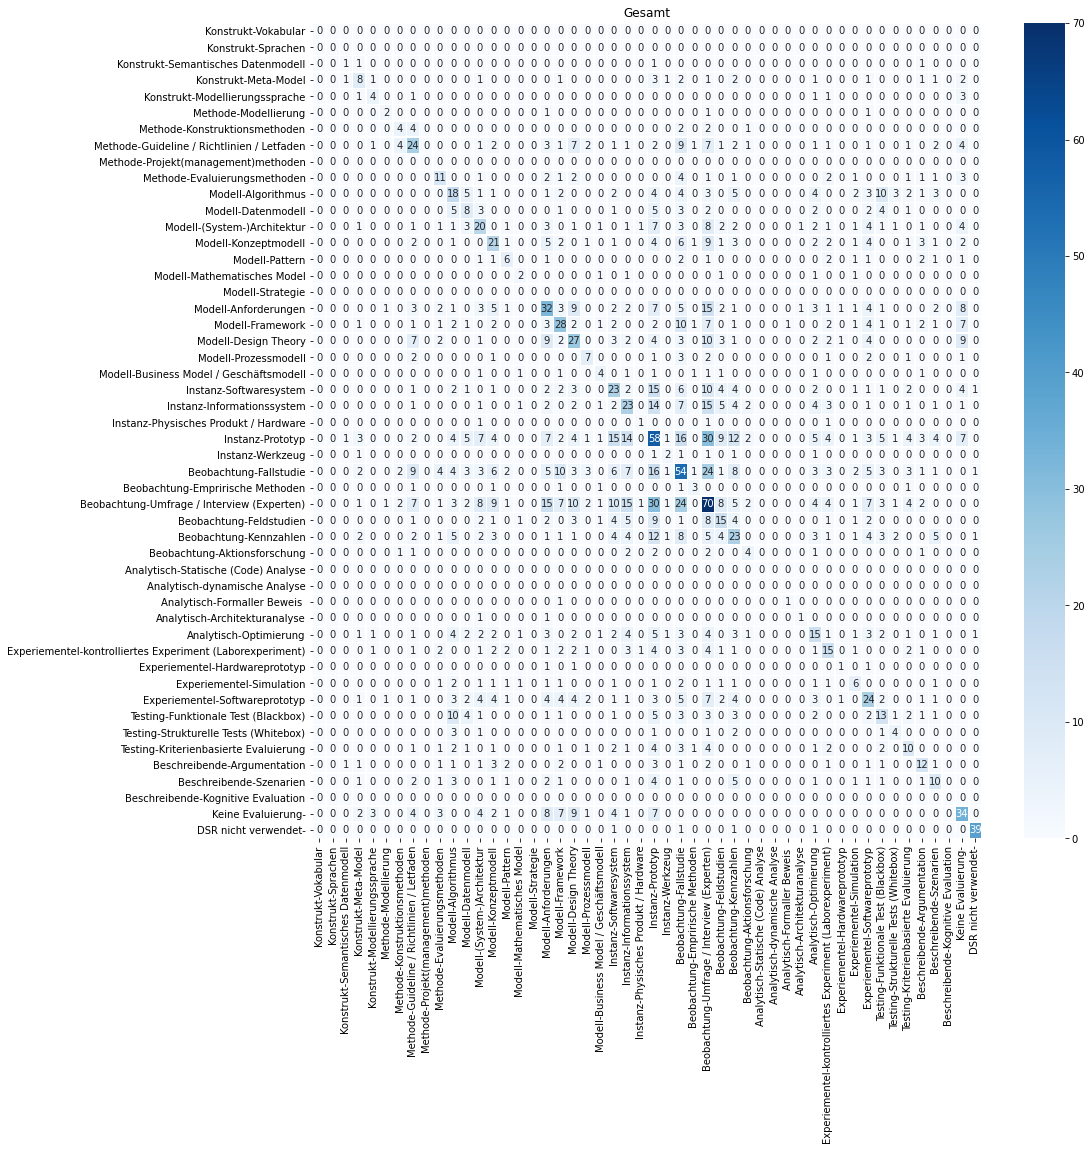

In [36]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_heat, linewidths=.5, annot=True, fmt='g', cmap="Blues").set(title='Gesamt', xlabel='', ylabel='');
plt.savefig('./img/Gesamt_Gesamt.png', dpi=400, bbox_inches='tight')

In [37]:
df_heat = dfnl[artefacts_lv1].T.dot(dfnl[evaluation_lv1.append(pd.Index(['Keine Evaluierung']))])

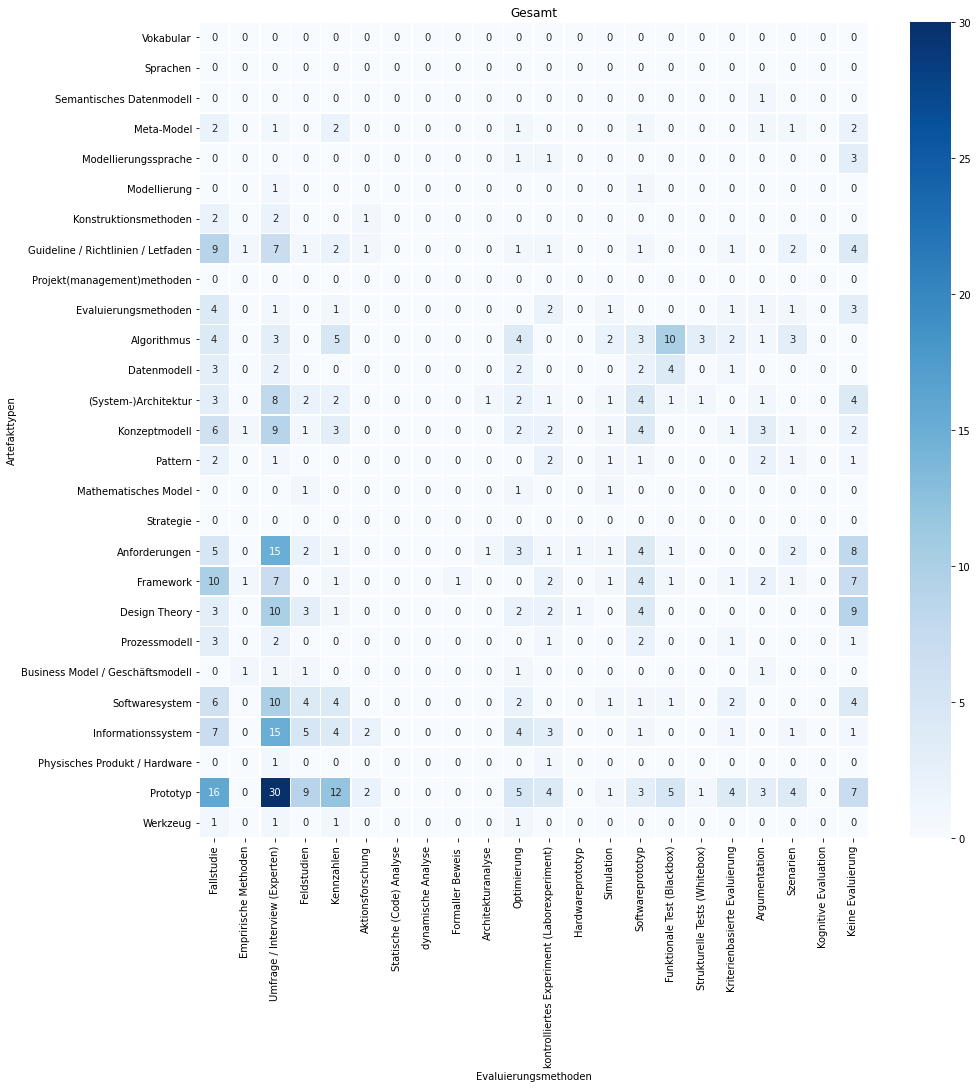

In [38]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_heat, linewidths=.5, annot=True, fmt='g', cmap="Blues").set(title='Gesamt', xlabel='Evaluierungsmethoden', ylabel='Artefakttypen');
plt.savefig('./img/ArtVal_Gesamt.png', dpi=400, bbox_inches='tight')

In [39]:
df_cat = df[['Konferenz', 'Paper', 'DSR nicht verwendet', 'Keine Evaluierung']]

In [40]:
for i in all_categories:
    df_cat[str(i)] = df[str(i)].sum(axis=1)

In [41]:
df_heat = df_cat[artefacts].T.dot(df_cat[evaluation+['Keine Evaluierung']])

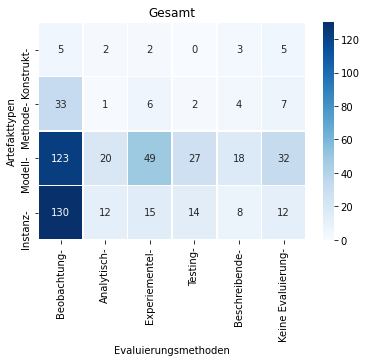

In [42]:
sns.heatmap(df_heat, linewidths=.5, annot=True, fmt='g', cmap="Blues").set(title='Gesamt', xlabel='Evaluierungsmethoden', ylabel='Artefakttypen');
plt.savefig('./img/Kategorien_Gesamt.png', dpi=400, bbox_inches='tight')

In [43]:
df_cat.groupby('Konferenz').sum()

,DSR nicht verwendet,Keine Evaluierung,Konstrukt,Methode,Modell,Instanz,Beobachtung,Analytisch,Experiementel,Testing,Beschreibende
,,,,,,,,,,,
Konferenz,,,,,,,,,,,
DESRIST,12,11,2,17,67,63,76,10,18,17,11
MKWI,1,13,7,10,56,22,42,3,13,4,8
WI,26,10,4,14,50,22,51,4,15,6,3


**DESRIST**

In [44]:
df_temp = df[df['Konferenz'] == 'DESRIST']
df_cat = df_temp[df_temp.Konferenz == 'DESRIST'].drop(columns=['Konferenz-ID', 'Konferenz', 'Jahr', 'Paper'])

In [45]:
df_heat = df_cat.T.dot(df_cat)

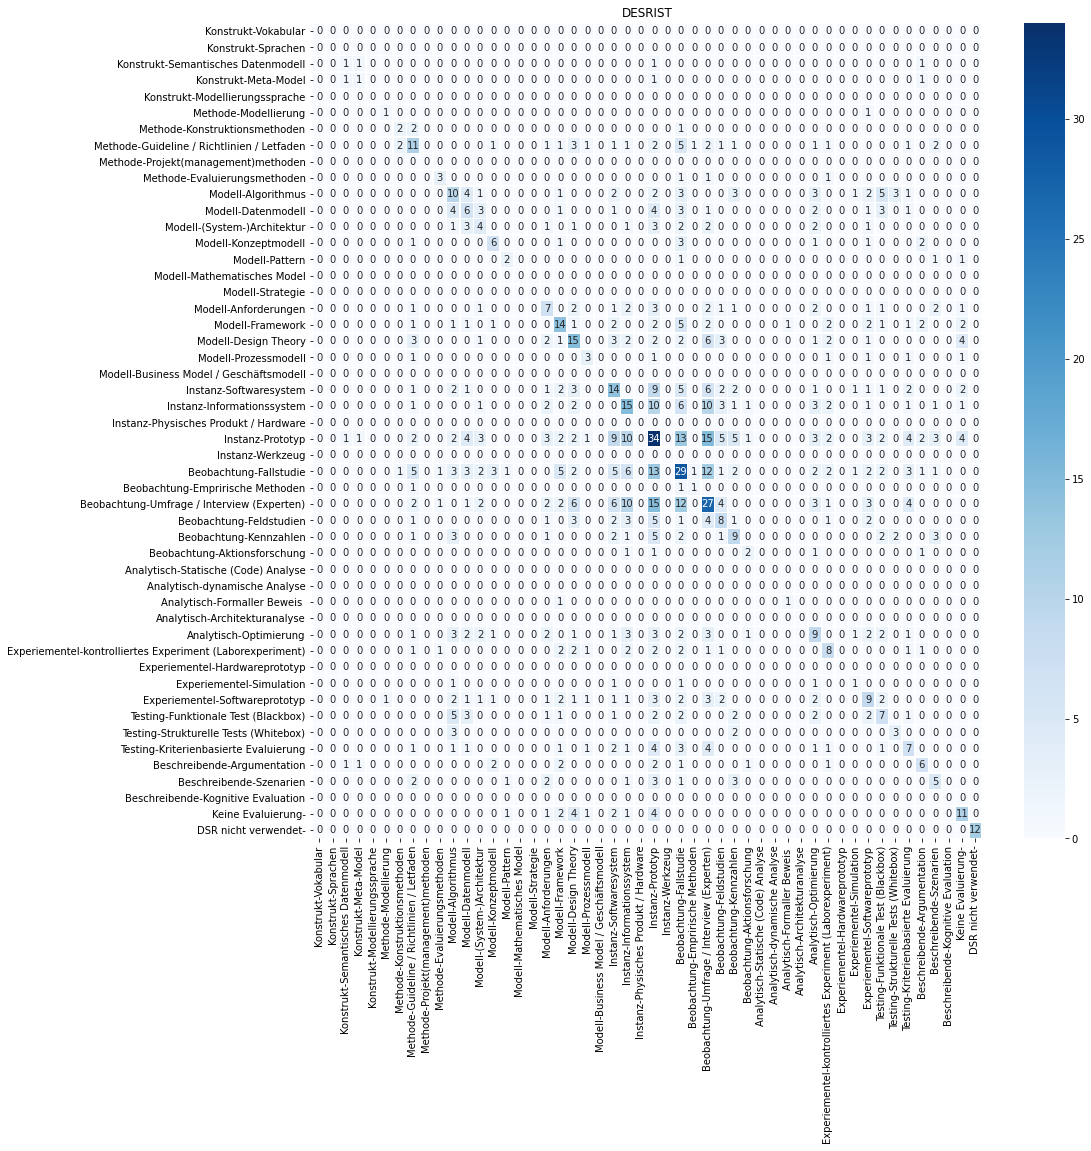

In [46]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_heat, linewidths=.5, annot=True, fmt='g', cmap="Blues").set(title='DESRIST', xlabel='', ylabel='');
plt.savefig('./img/Gesamt_DESRIST.png', dpi=400, bbox_inches='tight')

In [47]:
dfnl_temp = dfnl[dfnl['Konferenz'] == 'DESRIST']
df_heat = dfnl_temp[artefacts_lv1].T.dot(dfnl_temp[evaluation_lv1.append(pd.Index(['Keine Evaluierung']))])

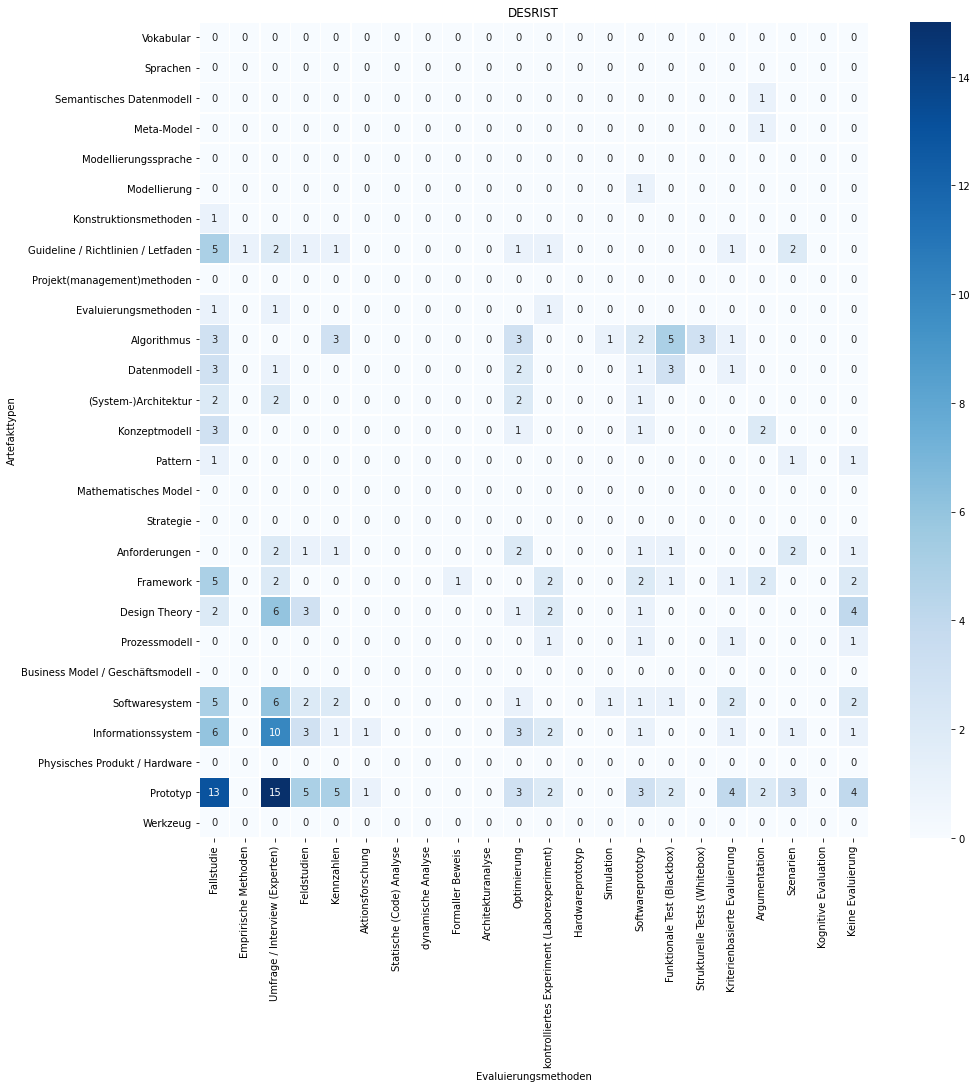

In [48]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_heat, linewidths=.5, annot=True, fmt='g', cmap="Blues").set(title='DESRIST', xlabel='Evaluierungsmethoden', ylabel='Artefakttypen');
plt.savefig('./img/ArtVal_DESRIST.png', dpi=400, bbox_inches='tight')

In [49]:
df_cat = df[df.Konferenz == 'DESRIST'][['Konferenz', 'Paper', 'DSR nicht verwendet', 'Keine Evaluierung']]

In [50]:
for i in all_categories:
    df_cat[str(i)] = df[df.Konferenz == 'DESRIST'][str(i)].sum(axis=1)

In [51]:
df_heat = df_cat[artefacts].T.dot(df_cat[evaluation+['Keine Evaluierung']])

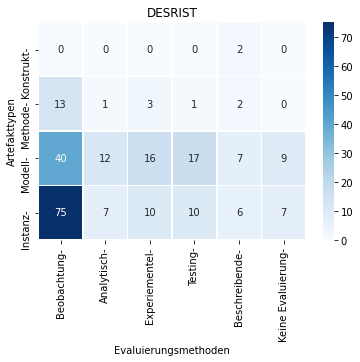

In [52]:
sns.heatmap(df_heat, linewidths=.5, annot=True, fmt='g', cmap="Blues").set(title='DESRIST', xlabel='Evaluierungsmethoden', ylabel='Artefakttypen');
plt.savefig('./img/Kategorien_DESRIST.png', dpi=400, bbox_inches='tight')

**MKWI**

In [53]:
df_temp = df[df['Konferenz'] == 'MKWI']
df_cat = df_temp[df_temp.Konferenz == 'MKWI'].drop(columns=['Konferenz-ID', 'Konferenz', 'Jahr', 'Paper'])

In [54]:
df_heat = df_cat.T.dot(df_cat)

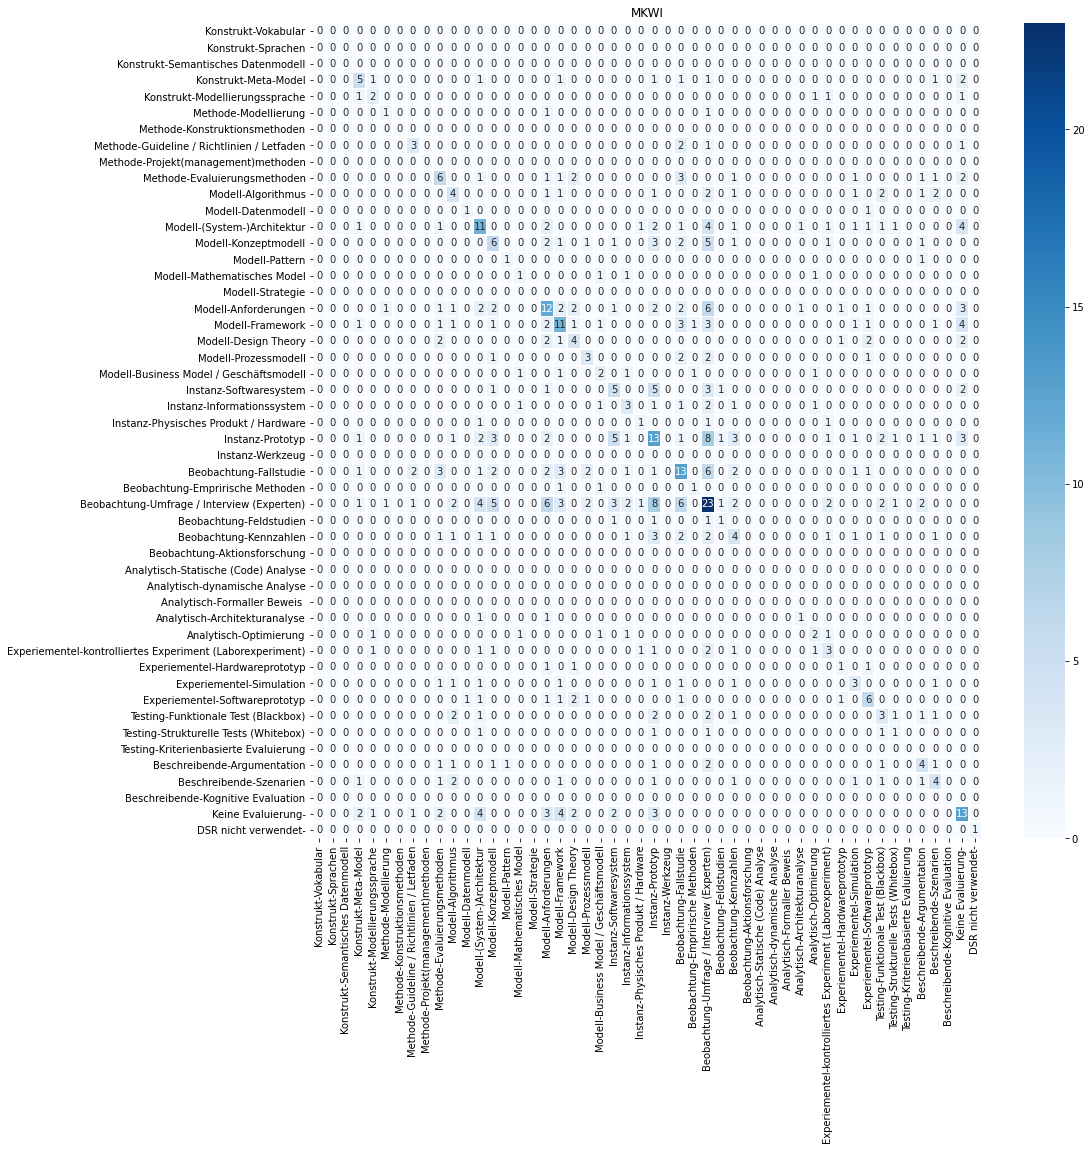

In [55]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_heat, linewidths=.5, annot=True, fmt='g', cmap="Blues").set(title='MKWI', xlabel='', ylabel='');
plt.savefig('./img/Gesamt_MKWI.png', dpi=400, bbox_inches='tight')

In [56]:
dfnl_temp = dfnl[dfnl['Konferenz'] == 'MKWI']
df_heat = dfnl_temp[artefacts_lv1].T.dot(dfnl_temp[evaluation_lv1.append(pd.Index(['Keine Evaluierung']))])

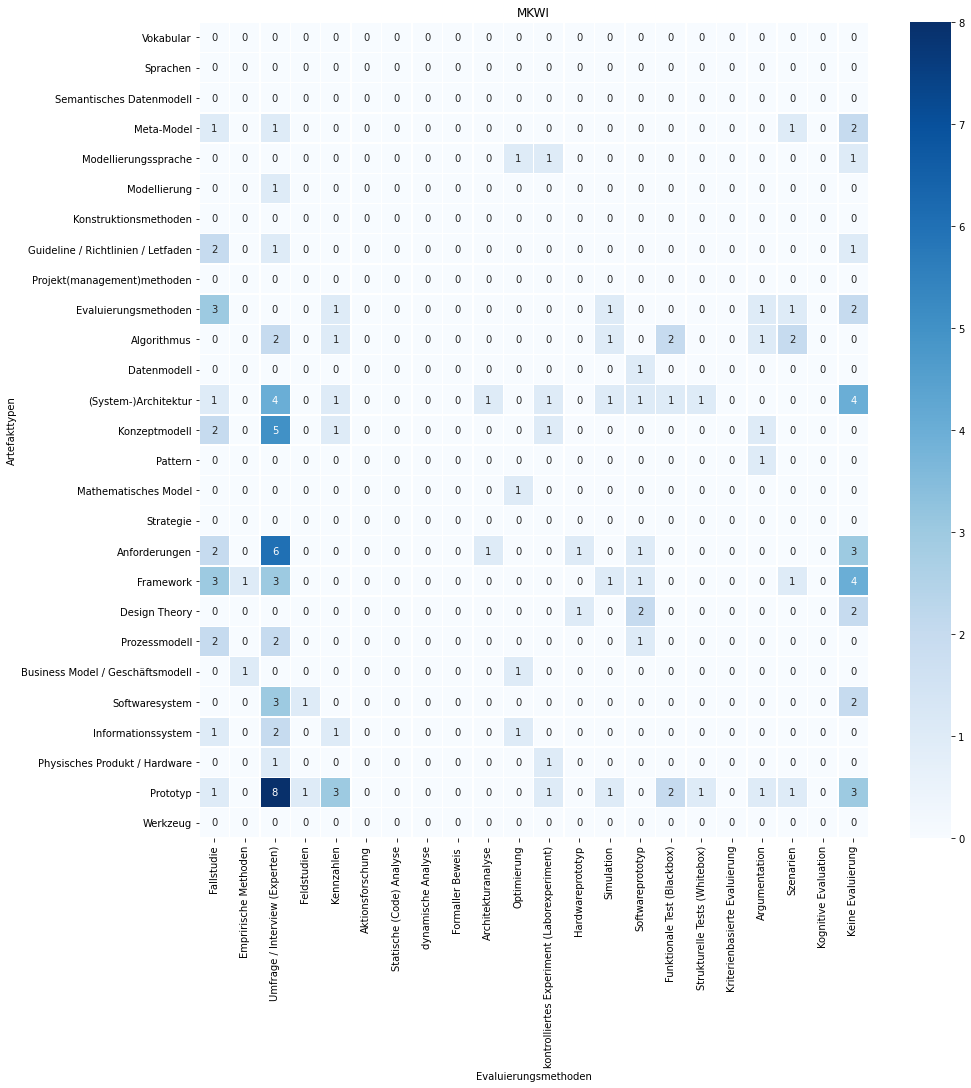

In [57]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_heat, linewidths=.5, annot=True, fmt='g', cmap="Blues").set(title='MKWI', xlabel='Evaluierungsmethoden', ylabel='Artefakttypen');
plt.savefig('./img/ArtVal_MKWI.png', dpi=400, bbox_inches='tight')

In [58]:
df_cat = df[df.Konferenz == 'MKWI'][['Konferenz', 'Paper', 'DSR nicht verwendet', 'Keine Evaluierung']]

In [59]:
for i in all_categories:
    df_cat[str(i)] = df[df.Konferenz == 'MKWI'][str(i)].sum(axis=1)

In [60]:
df_heat = df_cat[artefacts].T.dot(df_cat[evaluation+['Keine Evaluierung']])

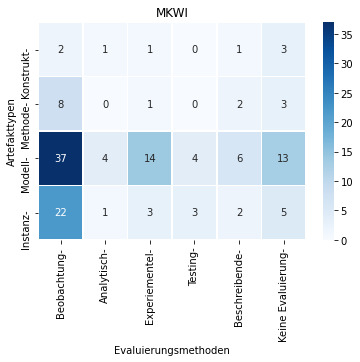

In [61]:
sns.heatmap(df_heat, linewidths=.5, annot=True, fmt='g', cmap="Blues").set(title='MKWI', xlabel='Evaluierungsmethoden', ylabel='Artefakttypen');
plt.savefig('./img/Kategorien_MKWI.png', dpi=400, bbox_inches='tight')

**WI**

In [62]:
df_temp = df[df['Konferenz'] == 'WI']
df_cat = df_temp[df_temp.Konferenz == 'WI'].drop(columns=['Konferenz-ID', 'Konferenz', 'Jahr', 'Paper'])

In [63]:
df_heat = df_cat.T.dot(df_cat)

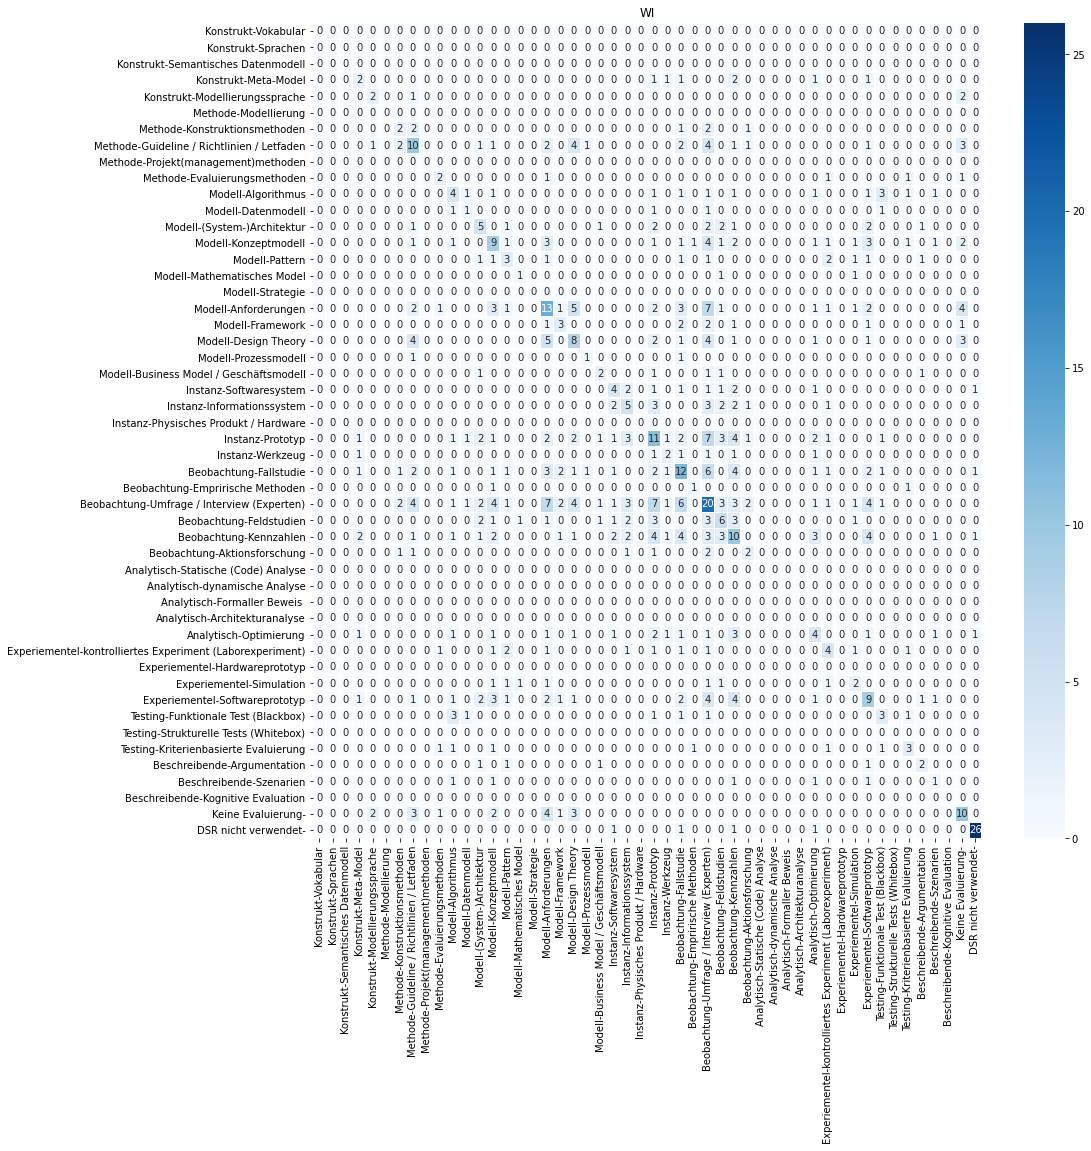

In [64]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_heat, linewidths=.5, annot=True, fmt='g', cmap="Blues").set(title='WI', xlabel='', ylabel='');
plt.savefig('./img/Gesamt_WI.png', dpi=400, bbox_inches='tight')

In [65]:
dfnl_temp = dfnl[dfnl['Konferenz'] == 'WI']
df_heat = dfnl_temp[artefacts_lv1].T.dot(dfnl_temp[evaluation_lv1.append(pd.Index(['Keine Evaluierung']))])

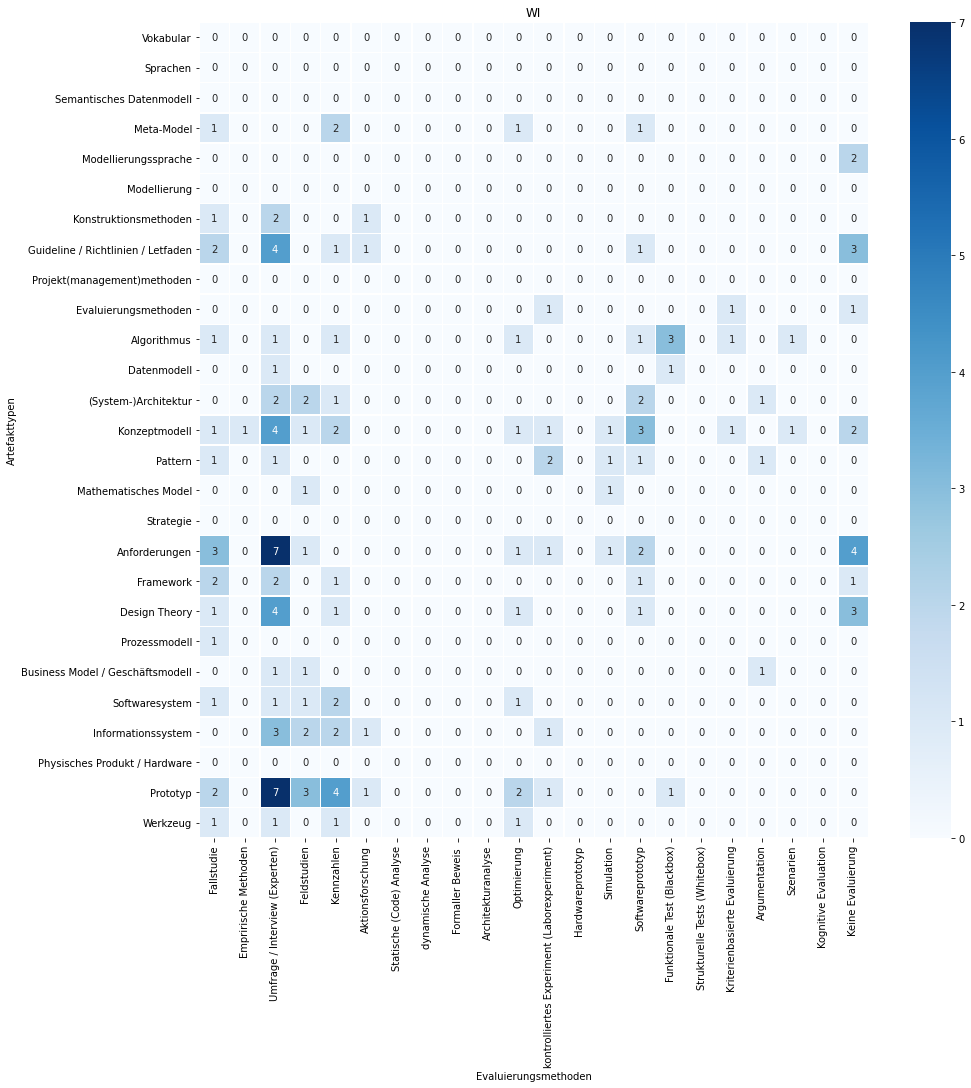

In [66]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_heat, linewidths=.5, annot=True, fmt='g', cmap="Blues").set(title='WI', xlabel='Evaluierungsmethoden', ylabel='Artefakttypen');
plt.savefig('./img/ArtVal_WI.png', dpi=400, bbox_inches='tight')

In [67]:
df_cat = df[df.Konferenz == 'WI'][['Konferenz', 'Paper', 'DSR nicht verwendet', 'Keine Evaluierung']]

In [68]:
for i in all_categories:
    df_cat[str(i)] = df[df.Konferenz == 'WI'][str(i)].sum(axis=1)

In [69]:
df_heat = df_cat[artefacts].T.dot(df_cat[evaluation+['Keine Evaluierung']])

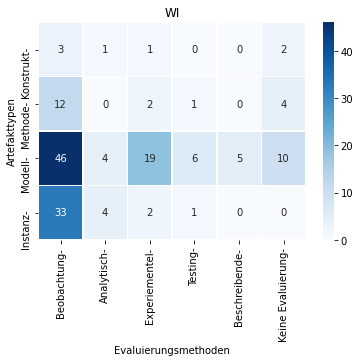

In [70]:
sns.heatmap(df_heat, linewidths=.5, annot=True, fmt='g', cmap="Blues").set(title='WI', xlabel='Evaluierungsmethoden', ylabel='Artefakttypen');
plt.savefig('./img/Kategorien_WI.png', dpi=400, bbox_inches='tight')

**Jahresvergleich**

Artefakte

In [71]:
df

Konferenz-ID Konferenz  Jahr                            Paper Konstrukt  \
                                                                   Vokabular   
0         WI 2019        WI  2019               (Espig et al 2019)         0   
1         WI 2019        WI  2019              (Dremel et al 2019)         0   
2         WI 2019        WI  2019          (Herrenkind et al 2019)         0   
3         WI 2019        WI  2019        (Sauer und Schubert 2019)         0   
4         WI 2019        WI  2019  (Poeppelbuss and Lubarski 2019)         0   
..            ...       ...   ...                              ...       ...   
234  DESRIST 2019   DESRIST  2019              (Akoka et al, 2019)         0   
235  DESRIST 2019   DESRIST  2019            (Babaian et al, 2019)         0   
236  DESRIST 2019   DESRIST  2019         (Zavolokina et al, 2019)         0   
237  DESRIST 2019   DESRIST  2019           (Treuku and Sun, 2019)         0   
238  DESRIST 2019   DESRIST  2019              (Haj-Bolouri, 2019)         0   

                                                                       \
    Sprachen Semantisches Datenmodell Meta-Model Modellierungssprache   
0          0                        0          0                    0   
1          0                        0          0                    0   
2          0                        0          0                    0   
3          0                        0          0                    0   
4          0                        0          0                    0   
..       ...                      ...        ...                  ...   
234        0                        0          0                    0   
235        0                        0          0                    0   
236        0                        0          0                    0   
237        0                        0          0                    0   
238        0                        0          0                    0   

         Methode  ... Experiementel                   \
    Modellierung  ...    Simulation Softwareprototyp   
0              0  ...             0                0   
1              0  ...             0                0   
2              0  ...             0                0   
3              0  ...             0                0   
4              0  ...             0                0   
..           ...  ...           ...              ...   
234            0  ...             0                0   
235            0  ...             0                0   
236            0  ...             0                0   
237            0  ...             1                0   
238            0  ...             0                1   

                        Testing                                \
    Funktionale Test (Blackbox) Strukturelle Tests (Whitebox)   
0                             0                             0   
1                             0                             0   
2                             1                             0   
3                             0                             0   
4                             0                             0   
..                          ...                           ...   
234                           0                             0   
235                           0                             0   
236                           0                             0   
237                           0                             0   
238                           0                             0   

                                  Beschreibende            \
    Kriterienbasierte Evaluierung Argumentation Szenarien   
0                               1             0         0   
1                               0             0         0   
2                               0             0         0   
3                               0             0         0   
4                               0             0         0   
..          

In [72]:
df_bar_raw = df.groupby('Jahr').sum()

In [73]:
df_bar_raw

Konstrukt                                               \
     Vokabular Sprachen Semantisches Datenmodell Meta-Model   
Jahr                                                          
2016         0        0                        0          3   
2017         0        0                        0          2   
2018         0        0                        1          3   
2019         0        0                        0          0   

                               Methode                        \
     Modellierungssprache Modellierung Konstruktionsmethoden   
Jahr                                                           
2016                    1            1                     0   
2017                    1            0                     2   
2018                    1            1                     0   
2019                    1            0                     2   

                                                                     \
     Guideline / Richtlinien / Letfaden Projekt(management)methoden   
Jahr                                                                  
2016                                  3                           0   
2017                                  9                           0   
2018                                  2                           0   
2019                                 10                           0   

                           ... Experiementel                   \
     Evaluierungsmethoden  ...    Simulation Softwareprototyp   
Jahr                       ...                                  
2016                    5  ...             3                4   
2017                    2  ...             1                6   
2018                    2  ...             0                6   
2019                    2  ...             2                8   

                         Testing                                \
     Funktionale Test (Blackbox) Strukturelle Tests (Whitebox)   
Jahr                                                             
2016                           2                             0   
2017                           3                             0   
2018                           3                             4   
2019                           5                             0   

                                   Beschreibende            \
     Kriterienbasierte Evaluierung Argumentation Szenarien   
Jahr                                                         
2016                             0             2         6   
2017                             6             5         1   
2018                             0             4         2   
2019                             4             1         1   

                          Keine Evaluierung DSR nicht verwendet  
     Kognitive Evaluation                                        
Jahr                                                             
2016                    0                 6                   9  
2017                    0                12                  15  
2018                    0                11                   3  
2019                    0                 5                  12  

[4 rows x 50 columns]

In [74]:
df_cat = df_bar_raw[['Konferenz', 'Paper']]

In [75]:
df_cat

Jahr
2016
2017
2018
2019


In [76]:
for i in artefacts:
    df_cat[str(i)] = df_bar_raw[str(i)].sum(axis=1)

In [77]:
df_cat

,Konstrukt,Methode,Modell,Instanz
,,,,
Jahr,,,,
2016,4,9,38,27
2017,3,13,52,41
2018,5,5,46,17
2019,1,14,37,22


In [78]:
def con_in_percent(x):
    df_cat.columns.get_level_values(0)
    print(sum(x))

In [79]:
df_cat_rel = df_cat.apply(lambda x: (round(x/x.sum(),2)*100), axis=1)

In [80]:
bars1 = df_cat_rel[df_cat_rel.index == 2016].iloc[0].tolist()
bars2 = df_cat_rel[df_cat_rel.index == 2017].iloc[0].tolist()
bars3 = df_cat_rel[df_cat_rel.index == 2018].iloc[0].tolist()
bars4 = df_cat_rel[df_cat_rel.index == 2019].iloc[0].tolist()

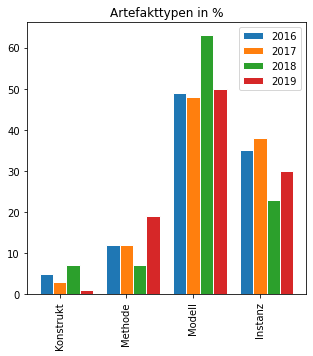

In [81]:
plt.figure(figsize=(5, 5))

barWidth = 0.2

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

plt.bar(r1, bars1, width=barWidth, edgecolor='white', label='2016')
plt.bar(r2, bars2, width=barWidth, edgecolor='white', label='2017')
plt.bar(r3, bars3, width=barWidth, edgecolor='white', label='2018')
plt.bar(r4, bars4, width=barWidth, edgecolor='white', label='2019')

plt.xticks([r + barWidth for r in range(len(bars1))], df_cat.columns.get_level_values(0), rotation='vertical')
plt.title('Artefakttypen in %')
plt.legend()
plt.savefig('./img/Artefakttypen_in_%.png', dpi=400, bbox_inches='tight')
plt.show()

Evaluierungsmethoden

In [82]:
df_bar_raw = df.groupby('Jahr').sum()

In [83]:
df_cat = df_bar_raw[['Konferenz', 'Paper', 'Keine Evaluierung']]

In [84]:
for i in evaluation:
    df_cat[str(i)] = df_bar_raw[str(i)].sum(axis=1)

In [85]:
df_cat

,Keine Evaluierung,Beobachtung,Analytisch,Experiementel,Testing,Beschreibende
,,,,,,
Jahr,,,,,,
2016,6,36,1,8,2,8
2017,12,61,8,11,9,6
2018,11,34,5,12,7,6
2019,5,38,3,15,9,2


In [86]:
def con_in_percent(x):
    df_cat.columns.get_level_values(0)
    print(sum(x))

In [87]:
df_cat_rel = df_cat.apply(lambda x: (round(x/x.sum(),2)*100), axis=1)

In [88]:
bars1 = df_cat_rel[df_cat_rel.index == 2016].iloc[0].tolist()
bars2 = df_cat_rel[df_cat_rel.index == 2017].iloc[0].tolist()
bars3 = df_cat_rel[df_cat_rel.index == 2018].iloc[0].tolist()
bars4 = df_cat_rel[df_cat_rel.index == 2019].iloc[0].tolist()

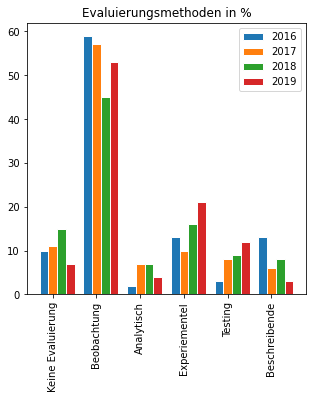

In [89]:
plt.figure(figsize=(5, 5))

barWidth = 0.2

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

plt.bar(r1, bars1, width=barWidth, edgecolor='white', label='2016')
plt.bar(r2, bars2, width=barWidth, edgecolor='white', label='2017')
plt.bar(r3, bars3, width=barWidth, edgecolor='white', label='2018')
plt.bar(r4, bars4, width=barWidth, edgecolor='white', label='2019')

plt.xticks([r + barWidth for r in range(len(bars1))], df_cat.columns.get_level_values(0), rotation='vertical')
plt.title('Evaluierungsmethoden in %')
plt.legend()
plt.savefig('./img/Evaluierungsmethoden_in_%.png', dpi=400, bbox_inches='tight')
plt.show()

**2016**

In [90]:
df_temp = df[df['Jahr'] == 2016]
df_cat = df_temp[df_temp.Jahr == 2016].drop(columns=['Konferenz-ID', 'Konferenz', 'Jahr', 'Paper'])

In [91]:
df_heat = df_cat.T.dot(df_cat)

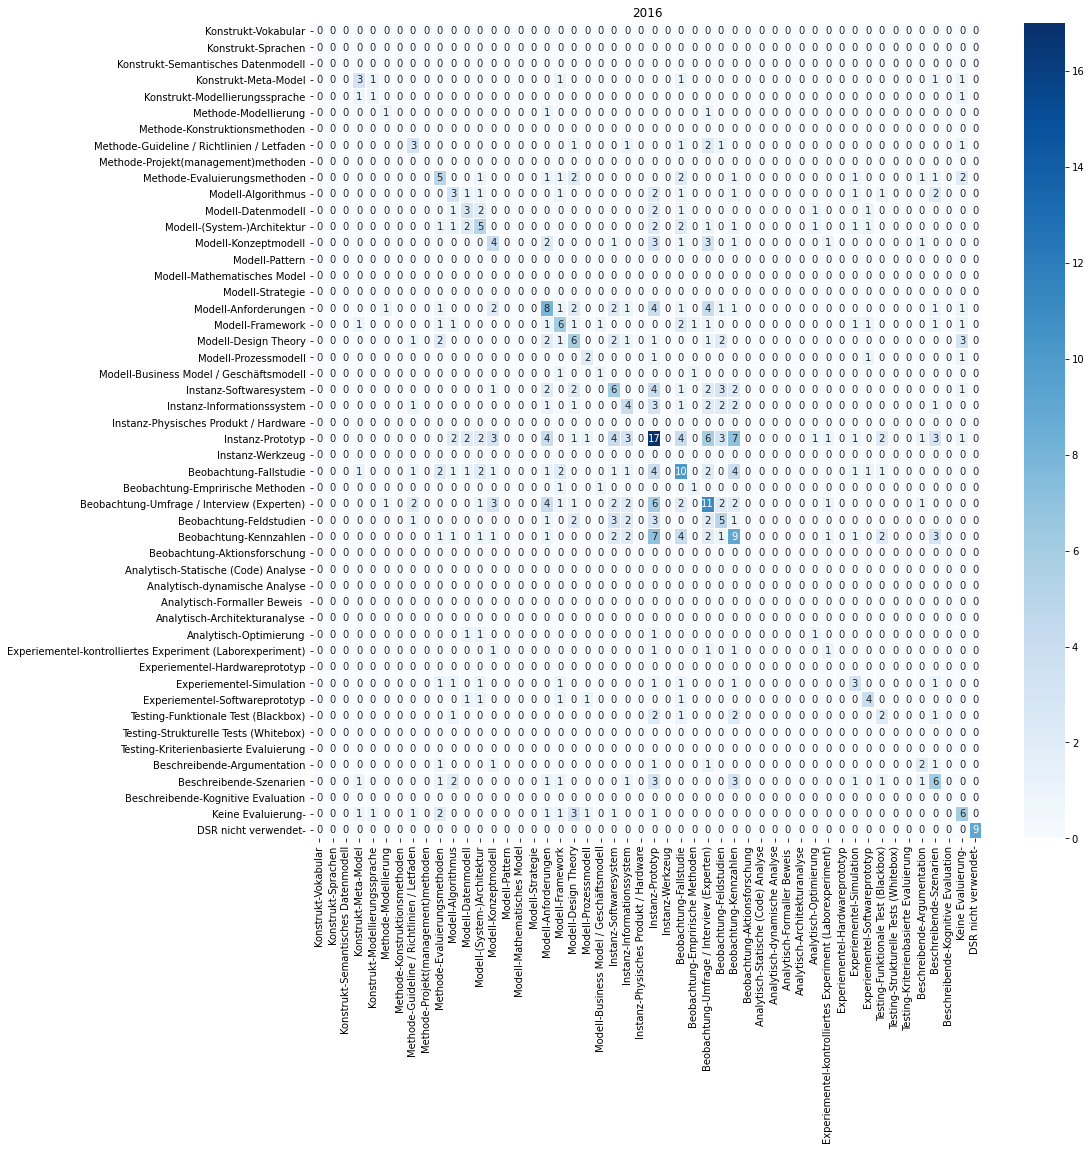

In [92]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_heat, linewidths=.5, annot=True, fmt='g', cmap="Blues").set(title='2016', xlabel='', ylabel='');
plt.savefig('./img/Gesamt_2016.png', dpi=400, bbox_inches='tight')

In [93]:
dfnl_temp = dfnl[dfnl['Jahr'] == 2016]
df_heat = dfnl_temp[artefacts_lv1].T.dot(dfnl_temp[evaluation_lv1.append(pd.Index(['Keine Evaluierung']))])

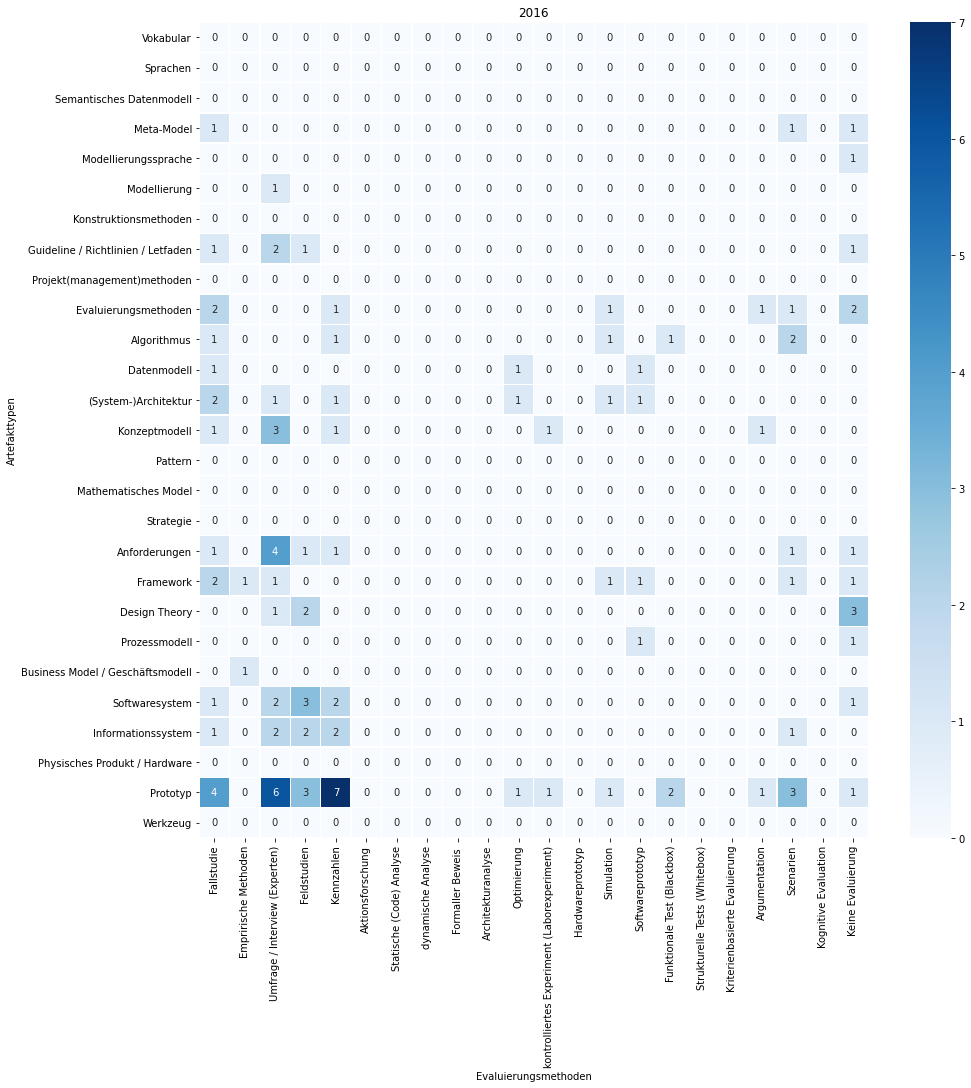

In [94]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_heat, linewidths=.5, annot=True, fmt='g', cmap="Blues").set(title='2016', xlabel='Evaluierungsmethoden', ylabel='Artefakttypen');
plt.savefig('./img/ArtVal_2016.png', dpi=400, bbox_inches='tight')

In [95]:
df_cat = df[df.Jahr == 2016][['Konferenz', 'Paper', 'DSR nicht verwendet', 'Keine Evaluierung']]

In [96]:
for i in all_categories:
    df_cat[str(i)] = df[df.Jahr == 2016][str(i)].sum(axis=1)

In [97]:
df_heat = df_cat[artefacts].T.dot(df_cat[evaluation+['Keine Evaluierung']])

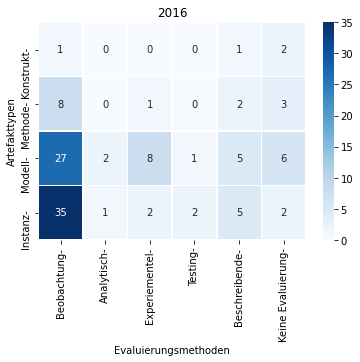

In [98]:
sns.heatmap(df_heat, linewidths=.5, annot=True, fmt='g', cmap="Blues").set(title='2016', xlabel='Evaluierungsmethoden', ylabel='Artefakttypen');
plt.savefig('./img/Kategorien_2016.png', dpi=400, bbox_inches='tight')

**2017**

In [99]:
df_temp = df[df['Jahr'] == 2017]
df_cat = df_temp[df_temp.Jahr == 2017].drop(columns=['Konferenz-ID', 'Konferenz', 'Jahr', 'Paper'])

In [100]:
df_heat = df_cat.T.dot(df_cat)

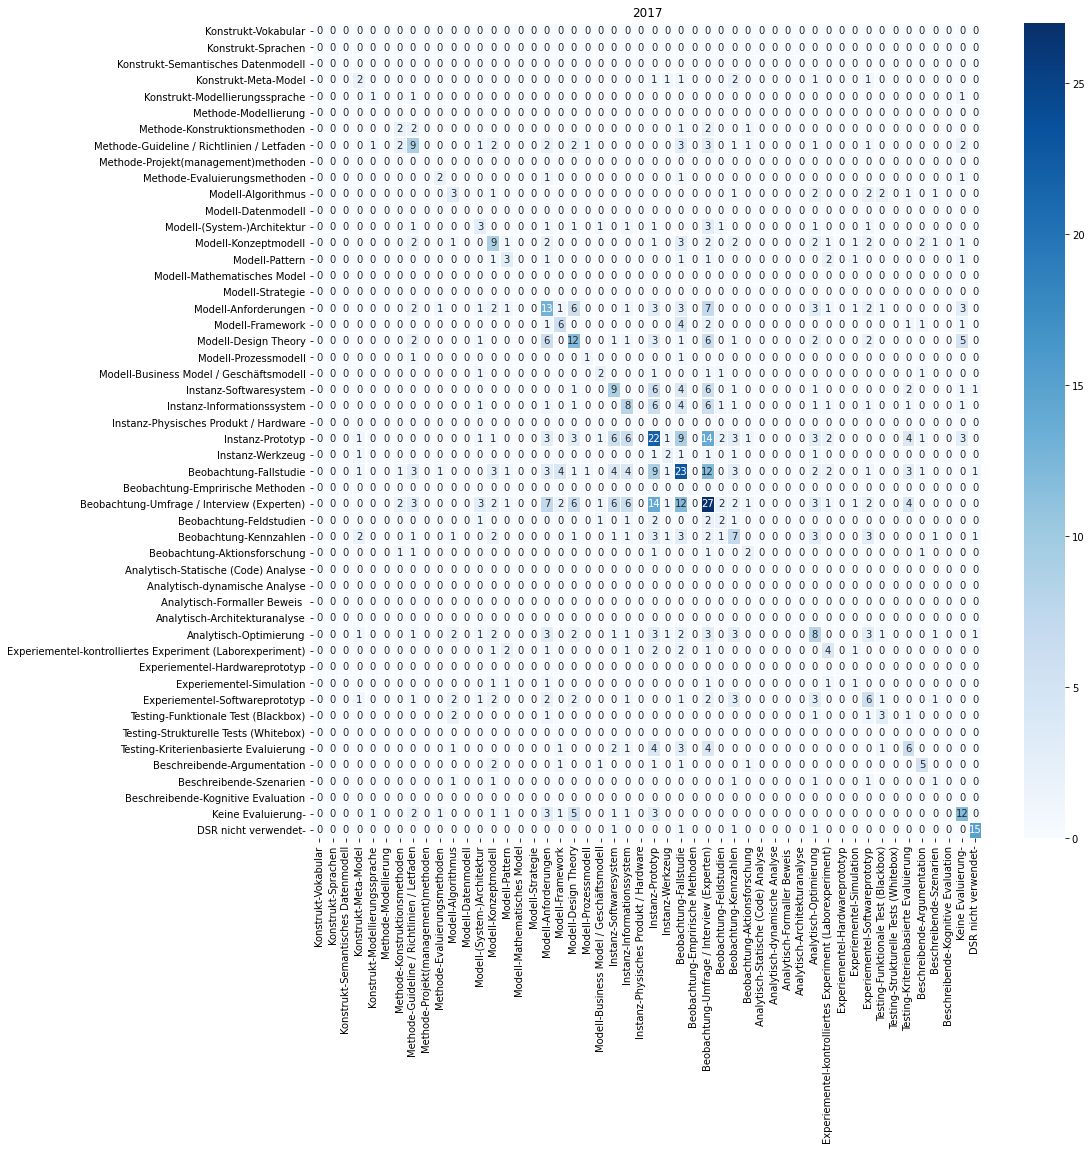

In [101]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_heat, linewidths=.5, annot=True, fmt='g', cmap="Blues").set(title='2017', xlabel='', ylabel='');
plt.savefig('./img/Gesamt_2017.png', dpi=400, bbox_inches='tight')

In [102]:
dfnl_temp = dfnl[dfnl['Jahr'] == 2017]
df_heat = dfnl_temp[artefacts_lv1].T.dot(dfnl_temp[evaluation_lv1.append(pd.Index(['Keine Evaluierung']))])

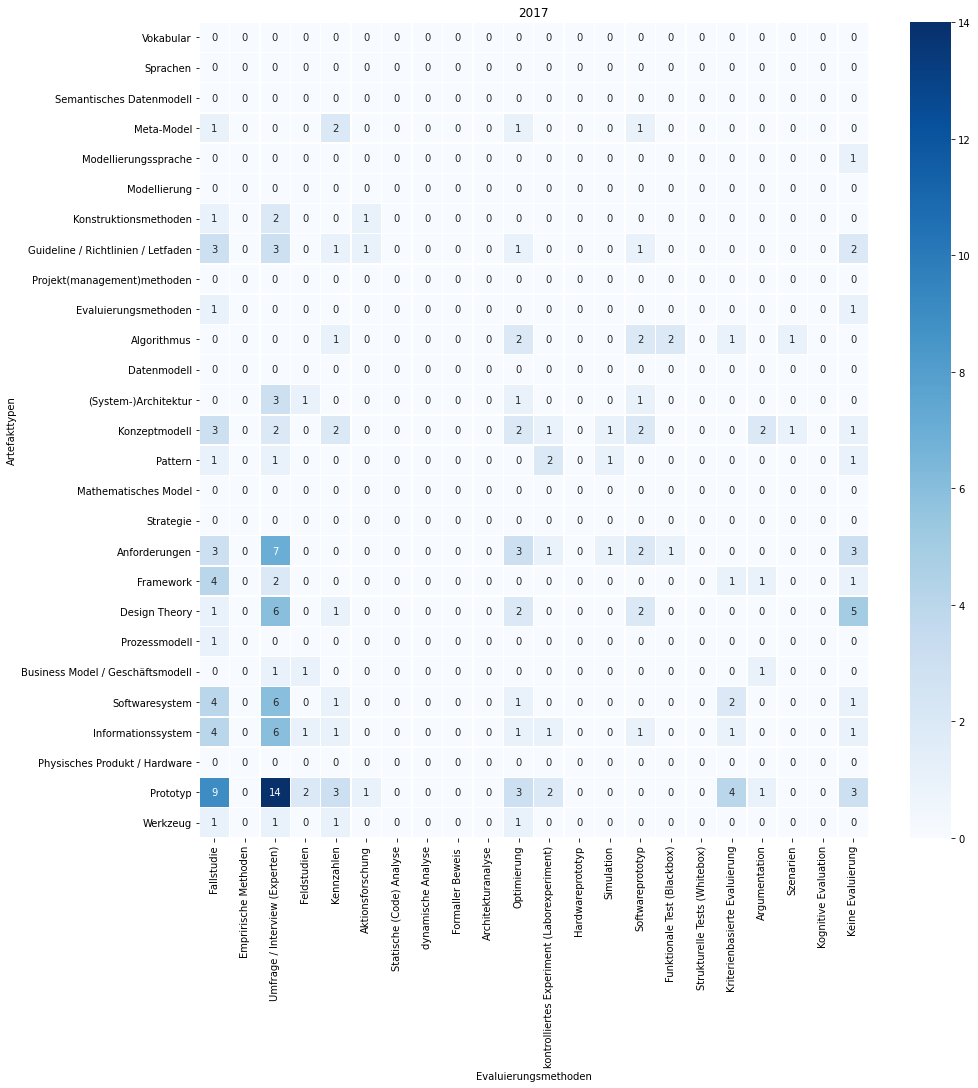

In [103]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_heat, linewidths=.5, annot=True, fmt='g', cmap="Blues").set(title='2017', xlabel='Evaluierungsmethoden', ylabel='Artefakttypen');
plt.savefig('./img/ArtVal_2017.png', dpi=400, bbox_inches='tight')

In [104]:
df_cat = df[df.Jahr == 2017][['Konferenz', 'Paper', 'DSR nicht verwendet', 'Keine Evaluierung']]

In [105]:
for i in all_categories:
    df_cat[str(i)] = df[df.Jahr == 2017][str(i)].sum(axis=1)

In [106]:
df_heat = df_cat[artefacts].T.dot(df_cat[evaluation+['Keine Evaluierung']])

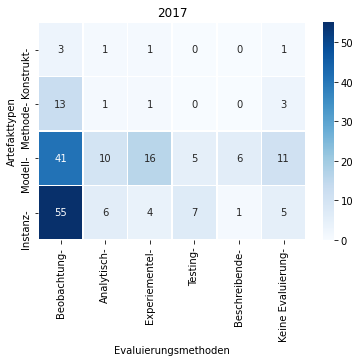

In [107]:
sns.heatmap(df_heat, linewidths=.5, annot=True, fmt='g', cmap="Blues").set(title='2017', xlabel='Evaluierungsmethoden', ylabel='Artefakttypen');
plt.savefig('./img/Kategorien_2017.png', dpi=400, bbox_inches='tight')

**2018**

In [108]:
df_temp = df[df['Jahr'] == 2018]
df_cat = df_temp[df_temp.Jahr == 2018].drop(columns=['Konferenz-ID', 'Konferenz', 'Jahr', 'Paper'])

In [109]:
df_heat = df_cat.T.dot(df_cat)

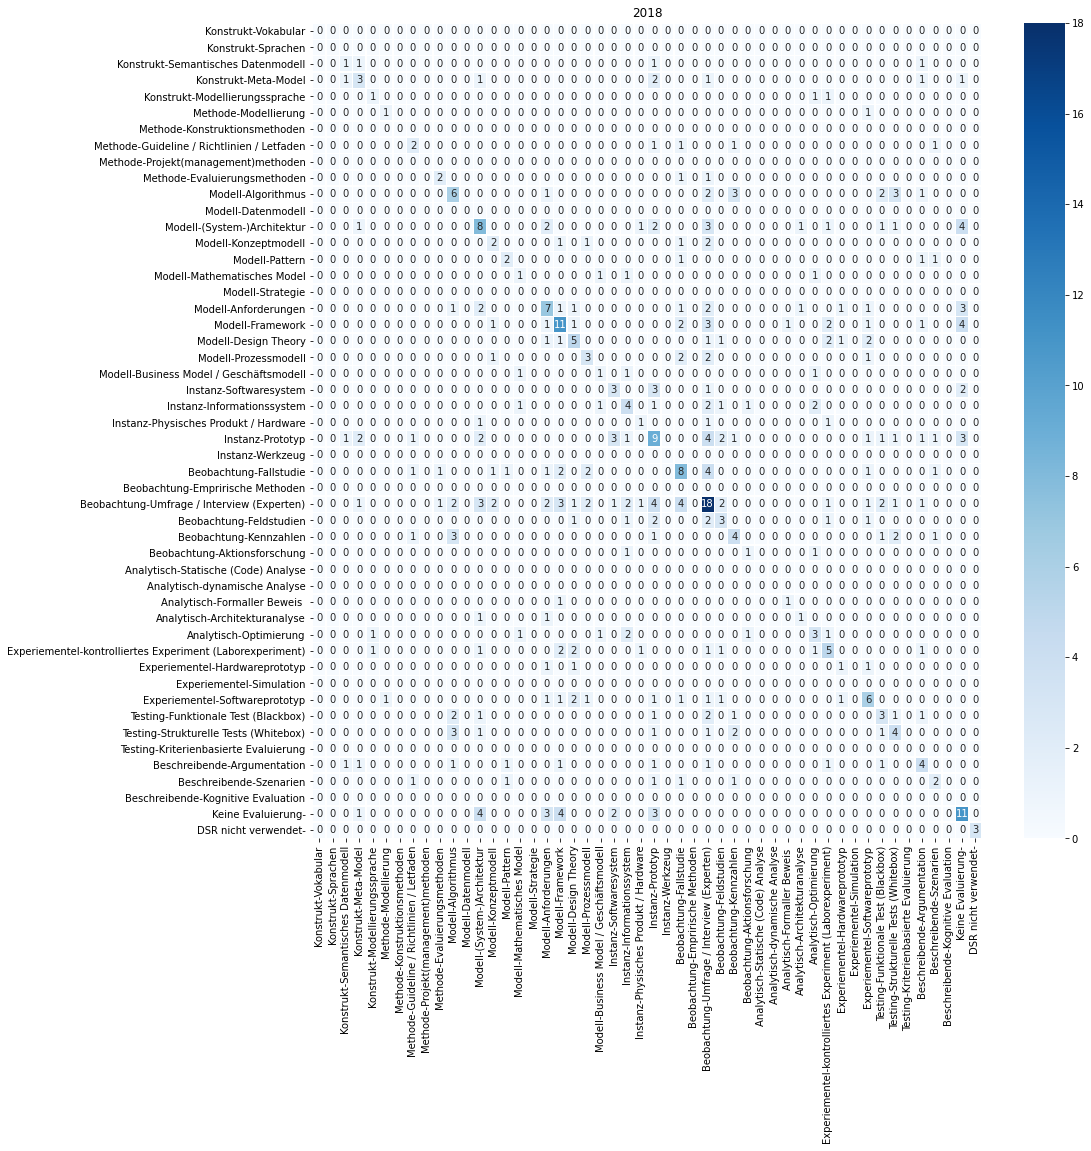

In [110]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_heat, linewidths=.5, annot=True, fmt='g', cmap="Blues").set(title='2018', xlabel='', ylabel='');
plt.savefig('./img/Gesamt_2018.png', dpi=400, bbox_inches='tight')

In [111]:
dfnl_temp = dfnl[dfnl['Jahr'] == 2018]
df_heat = dfnl_temp[artefacts_lv1].T.dot(dfnl_temp[evaluation_lv1.append(pd.Index(['Keine Evaluierung']))])

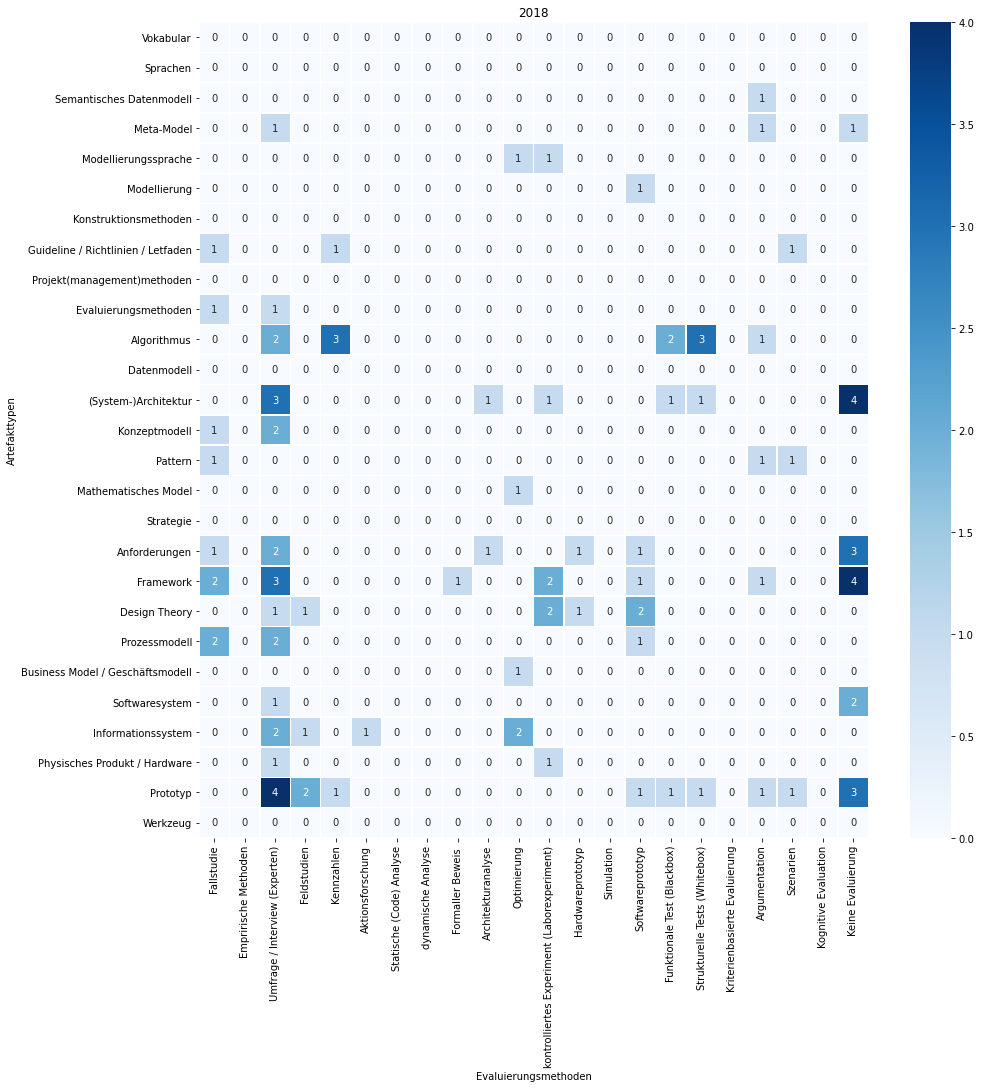

In [112]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_heat, linewidths=.5, annot=True, fmt='g', cmap="Blues").set(title='2018', xlabel='Evaluierungsmethoden', ylabel='Artefakttypen');
plt.savefig('./img/ArtVal_2018.png', dpi=400, bbox_inches='tight')

In [113]:
df_cat = df[df.Jahr == 2018][['Konferenz', 'Paper', 'DSR nicht verwendet', 'Keine Evaluierung']]

In [114]:
for i in all_categories:
    df_cat[str(i)] = df[df.Jahr == 2018][str(i)].sum(axis=1)

In [115]:
df_heat = df_cat[artefacts].T.dot(df_cat[evaluation+['Keine Evaluierung']])

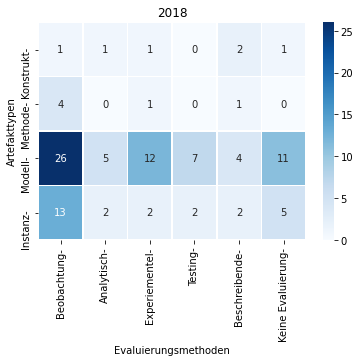

In [116]:
sns.heatmap(df_heat, linewidths=.5, annot=True, fmt='g', cmap="Blues").set(title='2018', xlabel='Evaluierungsmethoden', ylabel='Artefakttypen');
plt.savefig('./img/Kategorien_2018.png', dpi=400, bbox_inches='tight')

**2019**

In [117]:
df_temp = df[df['Jahr'] == 2019]
df_cat = df_temp[df_temp.Jahr == 2019].drop(columns=['Konferenz-ID', 'Konferenz', 'Jahr', 'Paper'])

In [118]:
df_heat = df_cat.T.dot(df_cat)

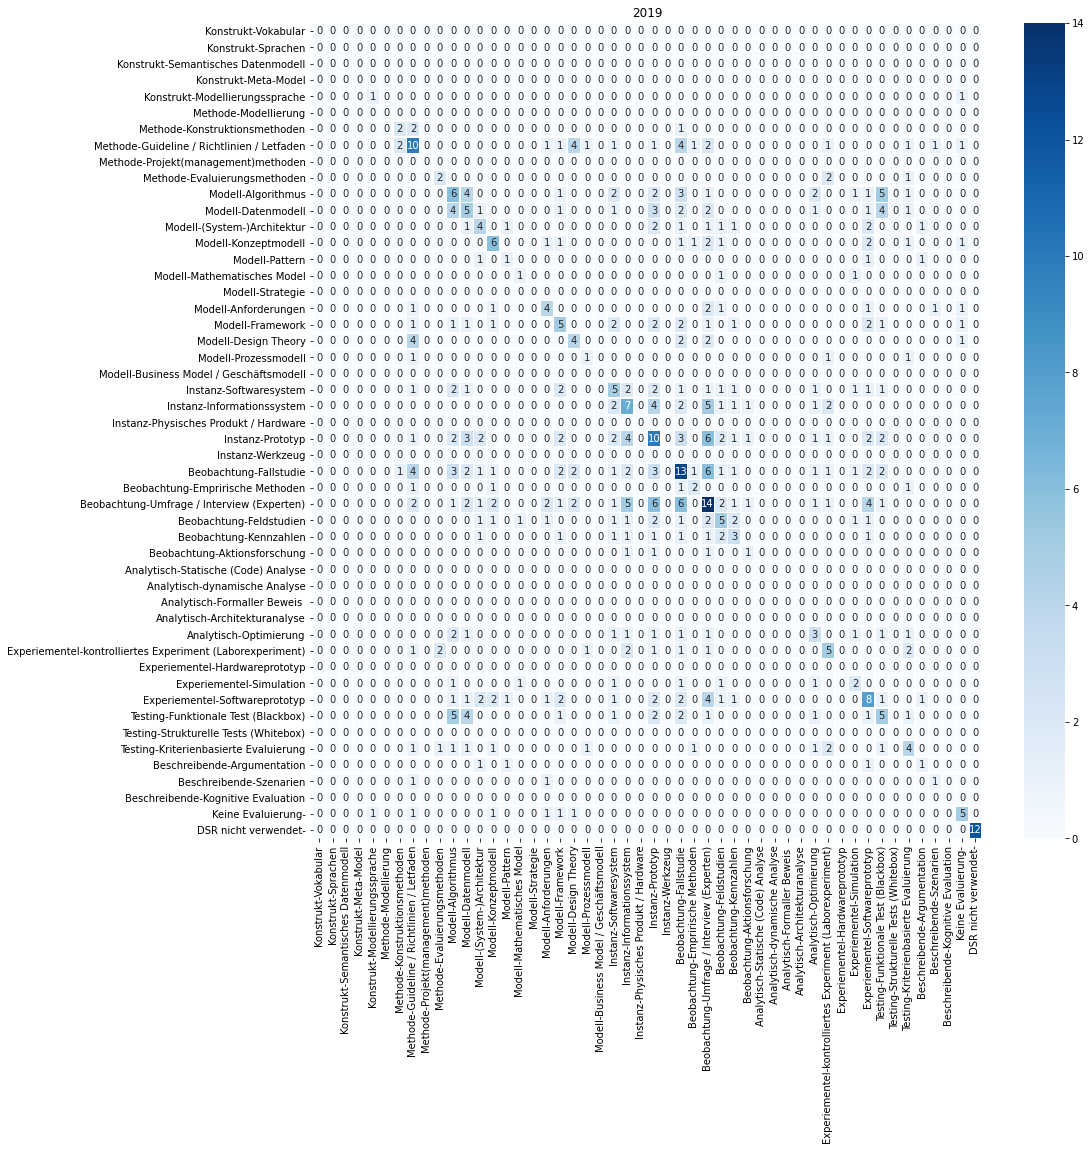

In [119]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_heat, linewidths=.5, annot=True, fmt='g', cmap="Blues").set(title='2019', xlabel='', ylabel='');
plt.savefig('./img/Gesamt_2019.png', dpi=400, bbox_inches='tight')

In [120]:
dfnl_temp = dfnl[dfnl['Jahr'] == 2019]
df_heat = dfnl_temp[artefacts_lv1].T.dot(dfnl_temp[evaluation_lv1.append(pd.Index(['Keine Evaluierung']))])

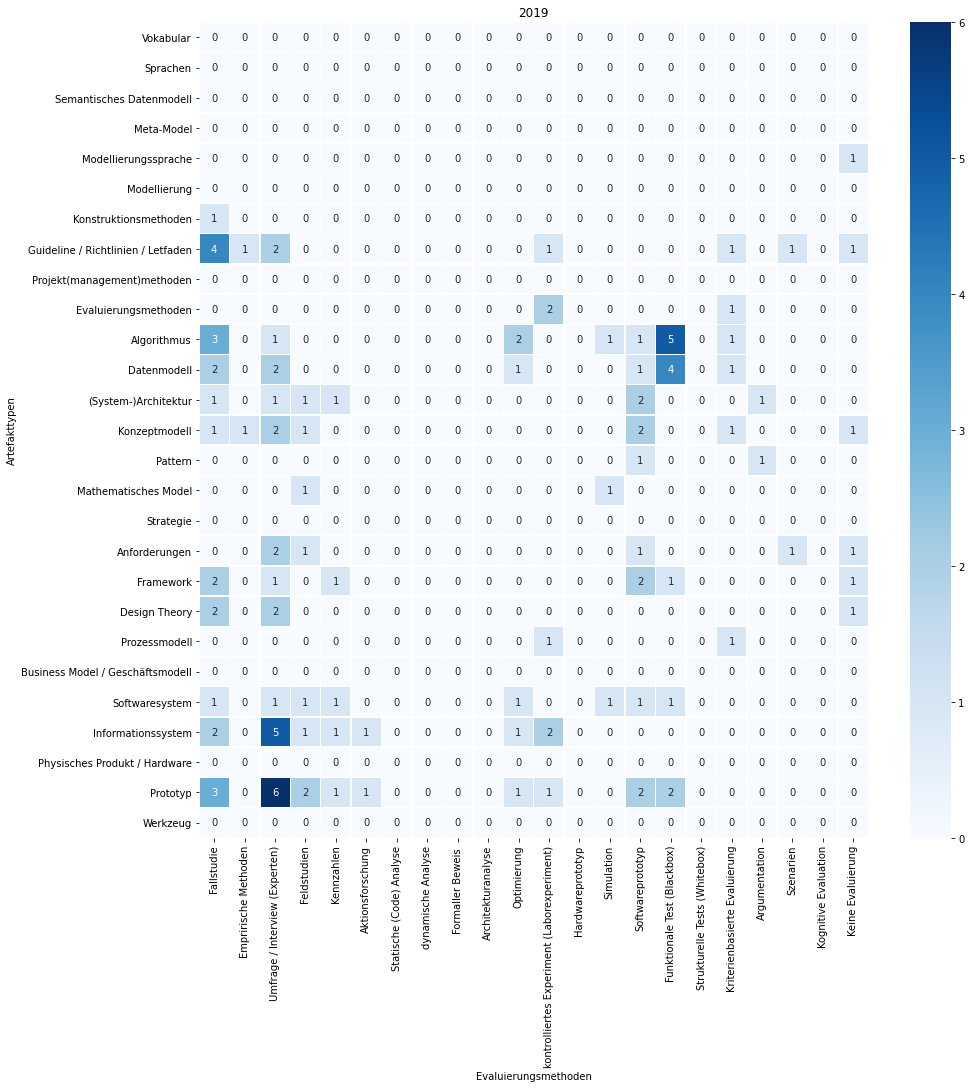

In [121]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_heat, linewidths=.5, annot=True, fmt='g', cmap="Blues").set(title='2019', xlabel='Evaluierungsmethoden', ylabel='Artefakttypen');
plt.savefig('./img/ArtVal_2019.png', dpi=400, bbox_inches='tight')

In [122]:
df_cat = df[df.Jahr == 2019][['Konferenz', 'Paper', 'DSR nicht verwendet', 'Keine Evaluierung']]

In [123]:
for i in all_categories:
    df_cat[str(i)] = df[df.Jahr == 2019][str(i)].sum(axis=1)

In [124]:
df_heat = df_cat[artefacts].T.dot(df_cat[evaluation+['Keine Evaluierung']])

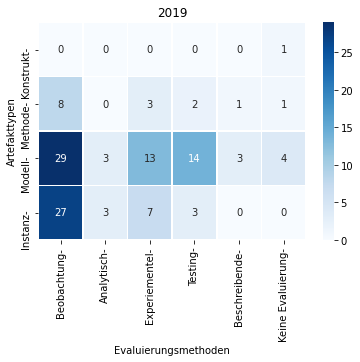

In [125]:
sns.heatmap(df_heat, linewidths=.5, annot=True, fmt='g', cmap="Blues").set(title='2019', xlabel='Evaluierungsmethoden', ylabel='Artefakttypen');
plt.savefig('./img/Kategorien_2019.png', dpi=400, bbox_inches='tight')